In [1]:
import pandas as pd
df= pd.read_csv('dataset/CAR DETAILS FROM CAR DEKHO.csv')
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1644,Maruti Wagon R VXI BS IV,2017.0,350000.0,30000,Petrol,Individual,Manual,First Owner
1444,Maruti Alto K10 VXI,2017.0,325000.0,15000,Petrol,Individual,Manual,First Owner
3208,Ford Figo Aspire 1.5 TDCi Ambiente ABS,2017.0,550000.0,100000,Diesel,Individual,Manual,First Owner
2558,Honda City i VTEC V,2016.0,696000.0,138925,Petrol,Dealer,Manual,First Owner
2210,Maruti 800 Std BSII,2006.0,90000.0,40000,Petrol,Individual,Manual,Second Owner


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4345 non-null   object 
 1   year           4342 non-null   float64
 2   selling_price  4342 non-null   float64
 3   km_driven      4345 non-null   int64  
 4   fuel           4342 non-null   object 
 5   seller_type    4345 non-null   object 
 6   transmission   4345 non-null   object 
 7   owner          4345 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.7+ KB


In [3]:
df.isna().sum()

name             0
year             3
selling_price    3
km_driven        0
fuel             3
seller_type      0
transmission     0
owner            0
dtype: int64

In [4]:
df.fillna(method='ffill',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

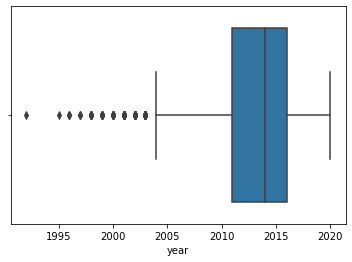

In [5]:
import seaborn as sns
sns.boxplot(df['year'])

In [6]:
df['year'].skew()

-0.8404380993053798

In [7]:
Q1=df['year'].quantile(0.25)
Q3=df['year'].quantile(0.75)
iqr=Q3-Q1
ul=Q3+1.5*iqr
ll=Q1-1.5*iqr

In [8]:
df[(df['year']>ul) | (df['year']<ll)]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
62,Mahindra Jeep CL 500 MDI,1996.0,250000.0,35000,Diesel,Individual,Manual,Second Owner
63,Honda City i DTEC VX,1996.0,675000.0,90000,Diesel,Dealer,Manual,First Owner
142,Maruti 800 Std,1998.0,40000.0,40000,Petrol,Individual,Manual,Fourth & Above Owner
146,Hyundai Santro LP zipPlus,2003.0,75000.0,57000,Petrol,Individual,Manual,First Owner
154,Hyundai Santro LE,2002.0,65000.0,70000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
4025,Maruti Gypsy King HT BSIV,2001.0,409999.0,49359,Petrol,Individual,Manual,Third Owner
4137,Maruti Zen LXI,2003.0,70000.0,60000,Petrol,Individual,Manual,Fourth & Above Owner
4158,Skoda Octavia Ambiente 1.9 TDI MT,2002.0,90000.0,116000,Diesel,Individual,Manual,Second Owner
4213,Toyota Qualis FS B3,2001.0,150000.0,256000,Diesel,Dealer,Manual,First Owner


In [9]:
import numpy as np
df['year']=np.where((df['year']>ul),
                                  ul,
                                  np.where((df['year']<ll),
                                                        ll,
                                                        df['year']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

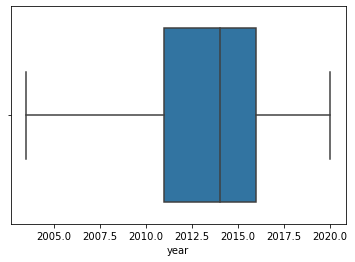

In [10]:
sns.boxplot(df['year'])

In [11]:
df.duplicated().sum()

766

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df['suggest'] = np.where((df['km_driven']>100000),'dont buy',
                        np.where((df['km_driven']<100000),'buy',df['km_driven']))

In [14]:
df.sample(13)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,suggest
1691,Chevrolet Aveo 1.4 CNG,2011.0,229999.0,100000,CNG,Individual,Manual,First Owner,100000
1635,Hyundai Santro Magna AMT BSIV,2019.0,400000.0,16000,Petrol,Individual,Automatic,First Owner,buy
2433,Toyota Innova 2.5 G (Diesel) 8 Seater,2013.0,1010000.0,120000,Diesel,Individual,Manual,First Owner,dont buy
1282,Volkswagen Polo 1.5 TDI Trendline,2014.0,415000.0,81358,Diesel,Dealer,Manual,First Owner,buy
3343,Maruti Ertiga VDI,2012.0,700000.0,110000,Diesel,Individual,Manual,Second Owner,dont buy
1229,Maruti Vitara Brezza VDi,2018.0,780000.0,50000,Diesel,Individual,Manual,First Owner,buy
92,Honda Brio S MT,2015.0,371000.0,20000,Petrol,Dealer,Manual,First Owner,buy
1450,Maruti Wagon R LX BSIII,2009.0,130000.0,70000,Petrol,Individual,Manual,Fourth & Above Owner,buy
3383,Maruti Eeco Smiles 5 Seater AC,2013.0,280000.0,76600,Petrol,Dealer,Manual,First Owner,buy
1643,Maruti Esteem Vxi,2005.0,100000.0,20000,Petrol,Individual,Manual,Second Owner,buy


In [15]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
transform=ColumnTransformer(transformers=[
    ('t1',StandardScaler(),['selling_price','km_driven']),
    ('t2',OneHotEncoder(sparse=False,drop='first'),['seller_type','transmission','fuel','suggest']),
    ('t3',OrdinalEncoder(categories=[['Test Drive Car','First Owner', 'Second Owner',
       'Third Owner','Fourth & Above Owner']]),['owner'])
],remainder='passthrough')

In [17]:
df = pd.DataFrame(transform.fit_transform(df),columns=range(0,14))